In [1]:
# Import modules.
import torch
import random

import numpy as np
import matplotlib.pyplot as plt

from torch import nn
from network import CNN
from figure import Figure
from trainer import Trainer
from hyperparameters import *
from torchinfo import summary
from optimizer import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
# Set training device.
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available.")
else:
    device = torch.device("cpu")
    print("CUDA is not available, using CPU instead.")

CUDA is available.


In [3]:
# Set random seed.
random_seed = 0

random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [4]:
# Set data transform.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4911, 0.4820, 0.4467),(0.2022, 0.1993, 0.2009)),
])

In [5]:
# Get training dataset.
train_data = datasets.CIFAR100(
    root=DATASET_PATH,
    train=True,
    download=True,
    transform=transform,
)

test_data = datasets.CIFAR100(
    root=DATASET_PATH,
    train=False,
    download=True,
    transform=transform,
)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

In [7]:
model = CNN()
model.to(device=device)

CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (con

In [8]:
# Set optimizer.
optimizer = Optimizer(params=model.parameters(), lr=1e-3)

In [9]:
# Set loss function.
loss_fn = nn.CrossEntropyLoss()

In [10]:
# Show summary of model.
summary(model, input_size=(1, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [1, 100]                  --
├─Sequential: 1-1                        [1, 32, 16, 16]           --
│    └─Conv2d: 2-1                       [1, 32, 32, 32]           896
│    └─BatchNorm2d: 2-2                  [1, 32, 32, 32]           64
│    └─ReLU: 2-3                         [1, 32, 32, 32]           --
│    └─Conv2d: 2-4                       [1, 32, 32, 32]           9,248
│    └─BatchNorm2d: 2-5                  [1, 32, 32, 32]           64
│    └─ReLU: 2-6                         [1, 32, 32, 32]           --
│    └─MaxPool2d: 2-7                    [1, 32, 16, 16]           --
├─Sequential: 1-2                        [1, 64, 8, 8]             --
│    └─Conv2d: 2-8                       [1, 64, 16, 16]           18,496
│    └─BatchNorm2d: 2-9                  [1, 64, 16, 16]           128
│    └─ReLU: 2-10                        [1, 64, 16, 16]           --
│    └

In [11]:
trainer = Trainer(model=model, optimizer=optimizer, loss_fn=loss_fn, train_loader=train_loader, test_loader=test_loader, device=device)

In [12]:
trainer.train(epochs=EPOCHS)

Epoch 0 | Progress: 100.000% | Loss: 4.261 |  Accuracy: 10.587%
Test | Progress: 100.000% | Loss: 4.198 |  Accuracy: 13.252%
Epoch 1 | Progress: 100.000% | Loss: 4.163 |  Accuracy: 16.030%
Test | Progress: 100.000% | Loss: 4.178 |  Accuracy: 15.625%
Epoch 2 | Progress: 100.000% | Loss: 4.104 |  Accuracy: 19.818%
Test | Progress: 100.000% | Loss: 4.111 |  Accuracy: 18.115%
Epoch 3 | Progress: 100.000% | Loss: 4.069 |  Accuracy: 22.248%
Test | Progress: 100.000% | Loss: 4.092 |  Accuracy: 21.250%
Epoch 4 | Progress: 100.000% | Loss: 4.041 |  Accuracy: 24.504%
Test | Progress: 100.000% | Loss: 4.069 |  Accuracy: 24.102%
Epoch 5 | Progress: 100.000% | Loss: 4.031 |  Accuracy: 25.614%
Test | Progress: 100.000% | Loss: 4.052 |  Accuracy: 24.199%
Epoch 6 | Progress: 100.000% | Loss: 4.017 |  Accuracy: 26.846%
Test | Progress: 100.000% | Loss: 4.056 |  Accuracy: 22.061%
Epoch 7 | Progress: 100.000% | Loss: 3.994 |  Accuracy: 28.091%
Test | Progress: 100.000% | Loss: 4.055 |  Accuracy: 25.303%


In [13]:
# Get train history.
loss_history, acc_history = trainer.get_train_history()

In [14]:
figure = Figure(figsize=(16, 4))

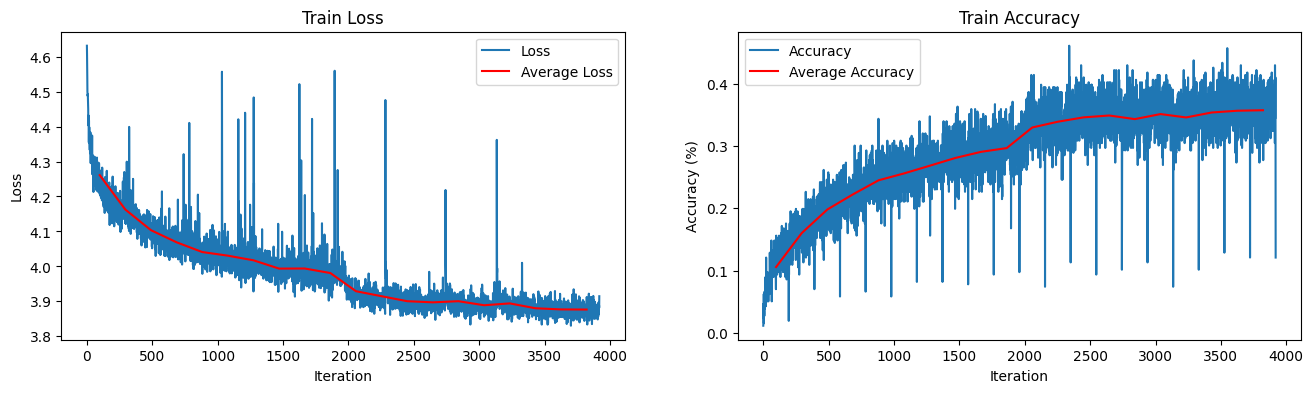

In [17]:
figure.draw(title="", loss_history=loss_history, acc_history=acc_history, iter_num=196, epoch_num=EPOCHS, save=True)

In [16]:
# Save loss and accuracy history.
loss_f = open("../results/loss_history.txt", "w")
acc_f = open("../results/acc_history.txt", "w")

loss_buffer = ""
acc_buffer = ""

for i in loss_history: loss_buffer += f"{str(i)},"
for i in acc_history: acc_buffer += f"{str(i)},"

loss_f.write(loss_buffer)
acc_f.write(acc_buffer)

loss_f.close()
acc_f.close()